# Data

## Build Dataset

In [ ]:
@misc{ignat2021detecting,
    title={Detecting Inspiring Content on Social Media},
    author={Oana Ignat and Y-Lan Boureau and Jane A. Yu and Alon Halevy},
    year={2021},
    eprint={2109.02734},
    archivePrefix={arXiv},
    primaryClass={cs.CL}
}

import pandas as pd

ids = pd.read_csv('data_all_post_ids.csv')

In [ ]:
ids.head()

,inspiring,not inspiring
0,18ypya,5s6czm
1,8u3p2f,2q1xjz
2,194wmf,16ff5p
3,1h8ctp,18fto4
4,17pkxd,671m2n


In [ ]:
inspiring=ids['inspiring']
not_inspiring=ids['not inspiring']

In [ ]:
inspiring = pd.DataFrame(inspiring).assign(result = 1)
not_inspiring = pd.DataFrame(not_inspiring).assign(result = 0)

In [ ]:
inspiring = inspiring.rename(columns = {'inspiring':'id'})
not_inspiring = not_inspiring.rename(columns = {'not inspiring':'id'})

In [ ]:
df = inspiring.append(not_inspiring)

In [ ]:
len(df)

11590

In [ ]:
df.head()

,id,result
0,18ypya,1
1,8u3p2f,1
2,194wmf,1
3,1h8ctp,1
4,17pkxd,1


In [ ]:
pip install praw

     |████████████████████████████████| 167 kB 5.3 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 


In [ ]:
import praw

reddit = praw.Reddit(client_id='F77JkePeSXMBgL_u3m9CBQ',
                     client_secret='DgQrUlyRndRlDYapNRD6GcOr_D_Vsg',
                     user_agent='smm_project_21',
                     check_for_async=False)

submissions = reddit.subreddit('opensource').hot(limit=5)
[str(x) for x in submissions]

['ql8hv2', 'ql10du', 'qlc9nr', 'qleahv', 'qldd4o']

In [ ]:
submission = reddit.submission(id='qkdl0k')

In [ ]:
submission.title

'Why do you follow people on GitHub?'

In [ ]:
submission.selftext

"I'm curious about why people follow others on GitHub.\n\nI follow people so that I get to know of any new projects they are working on or what projects they are exploring. (From new repos and new stars)\n\nWhy do you follow people? Are there any other reasons?\n\nI also asked this on [Twitter](https://twitter.com/sudo_navendu/status/1455158764403716102)."

In [ ]:
list_of_ids = list(df['id'])

In [ ]:
list_of_titles = []
error_count = 0
i = 0
for x in list_of_ids:
  try:
    list_of_titles.append(reddit.submission(id = x).title)
  except:
    list_of_titles.append('error')
    error_count += 1
    print(f"Error number {error_count} just occured.")
  i += 1
  if i % 250 == 0:
    print(f"Just finished ID # {i}")

In [ ]:
from google.colab import files

id_df = pd.DataFrame(list_of_ids)
title_df = pd.DataFrame(list_of_titles)

id_df.to_csv('id_df.csv')
title_df.to_csv('title_df.csv')

files.download('id_df.csv')
files.download('title_df.csv')

In [ ]:
list_of_content = []
error_count = 0
i = 0
for x in list_of_ids:
  try:
    list_of_content.append(reddit.submission(id = x).selftext)
  except:
    list_of_content.append('error')
    error_count += 1
    print(f"Error number {error_count} just occured.")
  i += 1
  if i % 250 == 0:
    print(f"Just finished ID # {i}")

In [ ]:
content_df = pd.DataFrame(list_of_content)
content_df.to_csv('content_df.csv')
files.download('content_df.csv')

## Load Data

In [ ]:
import io
import requests
import pandas as pd

#ID DataFrame
id_df=pd.read_csv('id_df.csv', header=None)

#Title DataFrame
title_df=pd.read_csv('title_df.csv', header=None)

#Content DataFrame
content_df=pd.read_csv('content_df.csv', header=None)

In [ ]:
df = pd.DataFrame(columns=['id', 'Title', 'Content'])

In [ ]:
len(content_df)

11593

In [ ]:
df['id'] = id_df[1].astype(str)
df['Title'] = title_df[1]
df['Content'] = content_df[1]

In [ ]:
ids = pd.read_csv('data_all_post_ids.csv')
ids.sample()

,inspiring,not inspiring
4445,2sht7f,41qfja


In [ ]:
inspiring = list(ids.inspiring)
not_inspiring = list(ids['not inspiring'])
df['result'] = df['id'].apply(lambda x: 'inspiring' if x in inspiring else ('not_inspiring' if x in not_inspiring else 'not_found'))

In [ ]:
len(df)

11591

In [ ]:
df = df[df['result'] != 'not_found']
title_df = df[df['Title'].notna()]
content_df = df[df['Content'].notna()]

In [ ]:
'''
#1=Inspiring
#0=Not Inspiring

result_df = pd.read_csv('ids_and_titles.csv')
result_df = result_df.drop(columns=['Unnamed: 0','title'])
result_df.result = result_df.result.astype(int)
result_df['id'] = result_df['id'].astype(str)
result_df['result'] = result_df['result'].map({1.0: 'inspiring', 0.0: 'not_inspiring'})
new_df = df.merge(result_df, on='id', how='outer')
new_df = new_df.drop_duplicates()
new_df = new_df.dropna()
'''

"\n#1=Inspiring\n#0=Not Inspiring\n\nresult_df = pd.read_csv('ids_and_titles.csv')\nresult_df = result_df.drop(columns=['Unnamed: 0','title'])\nresult_df.result = result_df.result.astype(int)\nresult_df['id'] = result_df['id'].astype(str)\nresult_df['result'] = result_df['result'].map({1.0: 'inspiring', 0.0: 'not_inspiring'})\nnew_df = df.merge(result_df, on='id', how='outer')\nnew_df = new_df.drop_duplicates()\nnew_df = new_df.dropna()\n"

In [ ]:
!pip install praw

In [ ]:
df.sample(1)

,id,Title,Content,result
5709,17c76a,error,error,inspiring


In [ ]:
#Verify that everything is matching
import praw

reddit = praw.Reddit(client_id='F77JkePeSXMBgL_u3m9CBQ',
                     client_secret='DgQrUlyRndRlDYapNRD6GcOr_D_Vsg',
                     user_agent='smm_project_21',
                     check_for_async=False)

sub = reddit.submission(id = '17nyzf')
sub_title = sub.title
sub_content = sub.selftext

print(f"Actual Title: {sub_title}\nActual Content: {sub_content}")


Actual Title: Polygon just did a great write-up of how my little game studio went zero-to-hero. It's been 3 hard years of balancing cashflow and releases.
Actual Content: [The Article on Polygon](http://www.polygon.com/2013/1/31/3936396/the-voxel-agents-from-the-game-no-one-bought-to-puzzle-retreat)

We work till we starve, literally. This next title is make-or-break for us. But do have a good time while doing it. I'd be happy to answer any question about how we operate. 



## Clean Data

In [ ]:
final_title_df = title_df[title_df.Title != 'error']
#final_title_df['label'] = final_title_df['result'].map({'inspiring': 1, 'not_inspiring': 0})
final_title_df.sample()

,id,Title,Content,result
2772,4wg9um,Aliens in RPGs,"I'm running some sci-fi games, and I'm looking...",inspiring


In [ ]:
len(final_title_df)

10643

In [ ]:
final_content_df = content_df[content_df.Content != 'error']
final_content_df['label'] = final_content_df['result'].map({'inspiring': "__label__inspiring", 'not_inspiring': '__label__not_inspiring'})
final_content_df.sample()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,Title,Content,result,label
3961,178p8t,"Just finished reading ""a dash of apples"" and I...",[deleted],inspiring,__label__inspiring


In [ ]:
len(final_content_df)

8379

# Bert

## Post titles

In [ ]:
# install
!pip install pytorch-pretrained-bert pytorch-nlp

# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


     |████████████████████████████████| 123 kB 8.8 MB/s 
     |████████████████████████████████| 90 kB 11.6 MB/s 
     |████████████████████████████████| 131 kB 63.9 MB/s 
     |████████████████████████████████| 8.1 MB 61.0 MB/s 
     |████████████████████████████████| 79 kB 10.0 MB/s 
     |████████████████████████████████| 138 kB 76.6 MB/s 
     |████████████████████████████████| 127 kB 75.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
query_data_train = list(final_title_df.Title)
len(query_data_train)

10643

In [ ]:
sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
print(sentences[0])

# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

[CLS] Fellow ents, don't be sad! [SEP]


100%|██████████| 231508/231508 [00:00<00:00, 899716.87B/s]


Tokenize the first sentence:
['[CLS]', 'fellow', 'en', '##ts', ',', 'don', "'", 't', 'be', 'sad', '!', '[SEP]']


In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [ ]:
labels = np.array(final_title_df.label)

In [ ]:
len(labels)

10643

In [ ]:
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. 
batch_size = 32

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

# BERT model summary
'''
BertForSequenceClassification(
    (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1)
            )
          )
          (intermediate): BertIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
          )
          (output): BertOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        '
        '
        '
      )
    )
    (pooler): BertPooler(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (activation): Tanh()
    )
  )
  (dropout): Dropout(p=0.1)
  (classifier): Linear(in_features=768, out_features=2, bias=True)
)
'''

100%|██████████| 407873900/407873900 [00:11<00:00, 36958848.85B/s]


"\nBertForSequenceClassification(\n    (bert): BertModel(\n    (embeddings): BertEmbeddings(\n      (word_embeddings): Embedding(30522, 768, padding_idx=0)\n      (position_embeddings): Embedding(512, 768)\n      (token_type_embeddings): Embedding(2, 768)\n      (LayerNorm): BertLayerNorm()\n      (dropout): Dropout(p=0.1)\n    )\n    (encoder): BertEncoder(\n      (layer): ModuleList(\n        (0): BertLayer(\n          (attention): BertAttention(\n            (self): BertSelfAttention(\n              (query): Linear(in_features=768, out_features=768, bias=True)\n              (key): Linear(in_features=768, out_features=768, bias=True)\n              (value): Linear(in_features=768, out_features=768, bias=True)\n              (dropout): Dropout(p=0.1)\n            )\n            (output): BertSelfOutput(\n              (dense): Linear(in_features=768, out_features=768, bias=True)\n              (LayerNorm): BertLayerNorm()\n              (dropout): Dropout(p=0.1)\n            )\n     

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.5920253125826518


Epoch:  25%|██▌       | 1/4 [02:40<08:02, 160.99s/it]

Validation Accuracy: 0.7407066993464052
Train loss: 0.3844192217787107


Epoch:  50%|█████     | 2/4 [05:21<05:21, 160.80s/it]

Validation Accuracy: 0.778390522875817
Train loss: 0.18405791513621808


Epoch:  75%|███████▌  | 3/4 [08:02<02:40, 160.84s/it]

Validation Accuracy: 0.7866625816993464
Train loss: 0.0786638848708632


Epoch: 100%|██████████| 4/4 [10:43<00:00, 160.82s/it]

Validation Accuracy: 0.7866625816993464


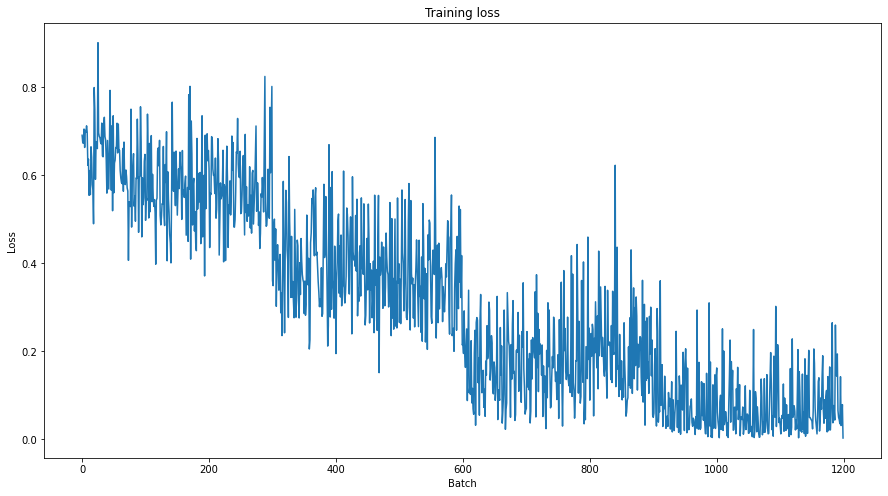

In [ ]:
# BERT fine-tuning parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 4

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

## Post Content

In [ ]:
# install
!pip install pytorch-pretrained-bert pytorch-nlp

# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
torch.cuda.empty_cache()

In [ ]:
query_data_train = list(final_content_df.Content)
len(query_data_train)

sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
print(sentences[0])

# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")


t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.6188842755253032


Epoch:  20%|██        | 1/5 [02:01<08:07, 121.89s/it]

Validation Accuracy: 0.6748511904761905
Train loss: 0.45094058751049687


Epoch:  40%|████      | 2/5 [04:03<06:05, 121.98s/it]

Validation Accuracy: 0.7165178571428571
Train loss: 0.3093570892588567


Epoch:  60%|██████    | 3/5 [06:06<04:04, 122.45s/it]

Validation Accuracy: 0.7254464285714286
Train loss: 0.21297855290063358


Epoch:  80%|████████  | 4/5 [08:09<02:02, 122.34s/it]

Validation Accuracy: 0.7433035714285714
Train loss: 0.1742726188721293


Epoch: 100%|██████████| 5/5 [10:12<00:00, 122.43s/it]

Validation Accuracy: 0.7232142857142857


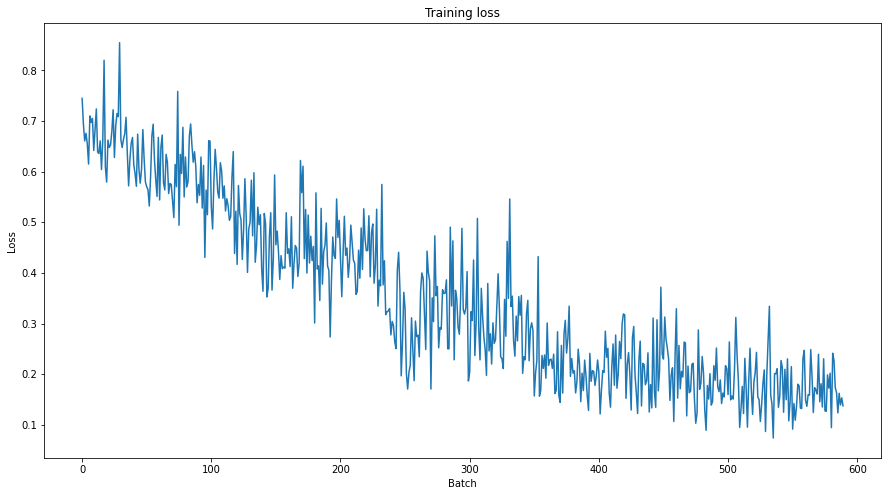

In [ ]:
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

labels = np.array(final_content_df.label)

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. 
batch_size = 64

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

# BERT fine-tuning parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
  
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 5

# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

#FastText

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_title_df, test_size=0.2)

In [ ]:
train_corpus = '\n'.join(list(train.apply(lambda x: "__label__" + df['result'].astype(str) + " " + df['Title'].astype(str))['result']))
test_corpus = '\n'.join(list(test.apply(lambda x: "__label__" + df['result'].astype(str) + " " + df['Title'].astype(str))['result']))

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 5.4 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3126478 sha256=fd054eb0aa7867d0a03b936c31b5c1ff28d8de7d70469f571145250b86e18d76
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
# Write line to file

with open('train.txt', 'w') as writefile:
    writefile.write(train_corpus)

In [ ]:
with open('test.txt', 'w') as writefile:
    writefile.write(test_corpus)

In [ ]:
import fasttext

model = fasttext.train_supervised('train.txt')

In [ ]:
print(model.words)
print(model.labels)

['</s>', 'the', 'to', 'a', 'of', 'and', 'I', 'you', 'in', 'for', 'is', 'What', 'that', 'your', 'error', 'on', 'my', 'with', 'are', 'do', 'have', 'it', '-', 'this', 'what', 'from', 'or', 'be', 'an', 'about', 'The', 'me', 'was', 'would', 'How', 'as', 'some', 'like', 'but', 'at', 'by', 'has', 'can', "I'm", 'all', 'not', 'how', 'just', 'A', 'one', 'any', 'we', 'up', 'am', 'who', 'people', 'get', 'If', 'out', 'so', 'My', 'been', 'new', 'most', 'if', 'AMA', 'Why', 'think', 'when', 'will', 'good', 'their', 'make', 'they', 'This', 'favorite', 'there', 'should', 'into', 'had', 'other', 'first', 'Looking', 'could', 'more', 'Is', 'book', 'want', 'ever', 'You', 'best', 'know', 'year', 'life', 'time', '&', 'books', 'his', "What's", 'after', 'Any', 'where', 'did', 'than', 'help', 'anyone', 'years', 'does', 'feel', 'TIL', "don't", "I've", 'only', 'need', 'song', 'no', 'were', 'made', 'really', 'he', 'over', 'Reddit,', 'got', 'our', 'Can', 'them', 'someone', 'Bill', 'world', 'going', 'Do', 'love', 'Ne

In [ ]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('test.txt'))

N	11590
P@1	0.567
R@1	0.567


In [ ]:
model.predict("I intend for this post to be the most inspirational post ever made!")

(('__label__inspiring',), array([0.99780071]))

# RoBERTa

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar zxvf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import argparse
import os
import random
from glob import glob

random.seed(0)

def main(args):
    for split in ['train', 'test']:
        samples = []
        for class_label in ['pos', 'neg']:
            fnames = glob(os.path.join(args.datadir, split, class_label) + '/*.txt')
            for fname in fnames:
                with open(fname) as fin:
                    line = fin.readline()
                    samples.append((line, 1 if class_label == 'pos' else 0))
        random.shuffle(samples)
        out_fname = 'train' if split == 'train' else 'dev'
        f1 = open(os.path.join(args.datadir, out_fname + '.input0'), 'w')
        f2 = open(os.path.join(args.datadir, out_fname + '.label'), 'w')
        for sample in samples:
            f1.write(sample[0] + '\n')
            f2.write(str(sample[1]) + '\n')
        f1.close()
        f2.close()

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--datadir', default='aclImdb')
    args = parser.parse_args()
    main(args)

usage: ipykernel_launcher.py [-h] [--datadir DATADIR]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-8a696428-ebcf-4901-882a-0d07d5b4a037.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
